In [1]:
!pip uninstall -y tensorflow


Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Successfully uninstalled tensorflow-2.15.0


In [2]:
!pip install tensorflow-cpu
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import torch
import transformers
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import torch.nn as nn

In [4]:
from huggingface_hub import login

#Enter your token here
HF_TOKEN = ''

login(HF_TOKEN)

Load the model weights in subsequent cells from HF

In [5]:
llama_path = 'meta-llama/Llama-2-7b-hf'
llama_model = AutoModelForCausalLM.from_pretrained(llama_path, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

In [6]:
baichuan_path = 'baichuan-inc/Baichuan2-7B-Base'
baichuan_model = AutoModelForCausalLM.from_pretrained(baichuan_path, trust_remote_code=True)

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

configuration_baichuan.py:   0%|          | 0.00/2.38k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- configuration_baichuan.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_baichuan.py:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

generation_utils.py:   0%|          | 0.00/2.97k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


quantizer.py:   0%|          | 0.00/9.07k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- quantizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- modeling_baichuan.py
- generation_utils.py
- quantizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
pip install xformers.


pytorch_model.bin.index.json:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.93G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.08G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
llama_tokenizer = AutoTokenizer.from_pretrained(llama_path, trust_remote_code=True)
baichuan_tokenizer = AutoTokenizer.from_pretrained(baichuan_path, trust_remote_code=True)

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/795 [00:00<?, ?B/s]

tokenization_baichuan.py:   0%|          | 0.00/9.63k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/baichuan-inc/Baichuan2-7B-Base:
- tokenization_baichuan.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/2.00M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

Load the **wikipedia** data to get sentences for output

In [8]:
import kagglehub

path = kagglehub.dataset_download("mikeortman/wikipedia-sentences")

print("Path to dataset files:", path)

100%|██████████| 314M/314M [00:02<00:00, 154MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mikeortman/wikipedia-sentences/versions/3


Read the dataset and sample **20** sentences at random for output results

In [9]:
import random
with open('/root/.cache/kagglehub/datasets/mikeortman/wikipedia-sentences/versions/3/wikisent2.txt', 'r') as f:
    contents = f.readlines()

sampled_sentences = random.sample([sentence.strip() for sentence in contents], 20)

In [10]:
def get_layer_output(model, layer_idx, tokenizer, sents):
    tokenizer.pad_token = tokenizer.eos_token

    inputs = tokenizer(sents, return_tensors="pt", padding=True, truncation=True)

    attention_mask = inputs['attention_mask']
    outputs = model(inputs['input_ids'], attention_mask=attention_mask, output_hidden_states=True)

    return outputs.hidden_states[layer_idx]


In [11]:
from torch.nn.functional import cosine_similarity

def cal_last_hidden_sim(layer_output1, layer_output2):
    # Flatten the outputs for similarity computation
    layer_output1 = layer_output1.view(-1, layer_output1.shape[-1])
    layer_output2 = layer_output2.view(-1, layer_output2.shape[-1])

    # Compute cosine similarity (mean similarity over all tokens)
    return cosine_similarity(layer_output1, layer_output2, dim=1).mean().item()


In [12]:
import matplotlib.pyplot as plt

def get_layer_sims(model, tokenizer, sents):
  layer_cosine_similarities = []
  num_layers = len(model.model.layers)

  start_layer = 0
  end_layer = 32
  current_layer_output = get_layer_output(model, start_layer, tokenizer, sents)

  for lay in range(start_layer, end_layer + 1):
      next_layer_output = get_layer_output(model, lay, tokenizer, sents)
      sim_value = cal_last_hidden_sim(current_layer_output, next_layer_output)

      layer_cosine_similarities.append(sim_value)

      current_layer_output = next_layer_output

  return layer_cosine_similarities

In [13]:
llama_cosine_similarities = get_layer_sims(llama_model, llama_tokenizer, sampled_sentences)
baichuan_cosine_similarities = get_layer_sims(baichuan_model, baichuan_tokenizer, sampled_sentences)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/usr/lib/python3.10/contextlib.py:103: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


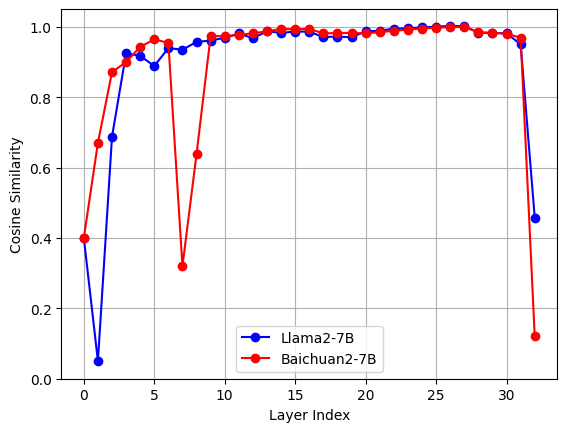

In [17]:
start_layer = 0
end_layer = 32
plt.plot(range(start_layer, end_layer + 1), llama_cosine_similarities, marker='o', linestyle='-', color='b',label='Llama2-7B')
plt.plot(range(start_layer, end_layer + 1), baichuan_cosine_similarities, marker='o', linestyle='-', color='r',label='Baichuan2-7B')
plt.ylim(0, 1.05)

plt.grid(True)
plt.xlabel('Layer Index')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.savefig('cosine_similarities_7B_models.jpg', dpi = 300)
plt.show()
